In [ ]:
멜스펙토그램 생성

In [1]:
import librosa
import numpy as np

# 16kHz , 128= Mel필터의 개수(주파수 해상도)
def extract_mel_spectrogram(wav_path, sr=16000, n_mels=128):
    # 오디오 로드
    audio, sr = librosa.load(wav_path, sr=sr)
    # Mel-spectrogram 생성
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    # 로그 스케일(데시벨 단위)로 변환 ,인간의 청각 감각에 더 적합한 형식
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    return log_mel_spec

# 테스트: WAV 파일에서 Mel-spectrogram 추출
test_wav_path = "/data/audio1/unzipped_TS1/TS1/folder_1/folder_1/0032_G1A4E2S0C0_KDD/0032_G1A4E2S0C0_KDD_001066.wav"
mel_spec = extract_mel_spectrogram(test_wav_path)
print(f"Mel-spectrogram shape: {mel_spec.shape}")


Mel-spectrogram shape: (128, 118)


In [ ]:
시각화

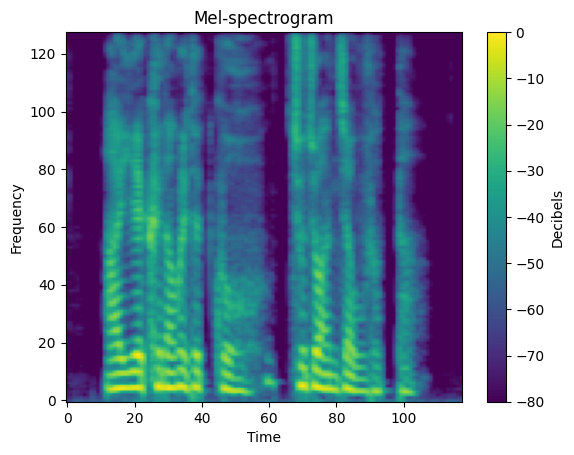

In [2]:
import matplotlib.pyplot as plt

plt.imshow(mel_spec, aspect='auto', origin='lower')
plt.title("Mel-spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label="Decibels")
plt.show()

In [ ]:
멜스펙토르램 크기 조정 (244X244)

In [5]:
from skimage.transform import resize

def resize_spectrogram(mel_spec, target_shape=(224, 224)):
    return resize(mel_spec, target_shape, mode='constant', anti_aliasing=True)

# 테스트: Mel-spectrogram 크기 조정
resized_mel = resize_spectrogram(mel_spec)
print(f"Resized shape: {resized_mel.shape}")

Resized shape: (224, 224)
